In [1]:
import numpy as np
from matplotlib import pyplot as plt, cm
from pymicro.crystal.ebsd import OimScan
from pymicro.crystal.lattice import Lattice, Symmetry
from pymicro.crystal.microstructure import Microstructure, Orientation

In [6]:
roi, ds = [0, 600, 0, 450], 3
scan = OimScan.from_file('Eprouvette_20220719_Specimen_1_Site_4_Map_Data_7.ctf', 
                         crop=(roi, ds), use_spatial_ref_frame=False)

Eprouvette_20220719_Specimen_1_Site_4_Map_Data_7 .ctf
init with shape (0, 0)
symmetry was changed to Symmetry.cubic
warning, elastic constants are inconsistent for this symmetry, please update them.
adding phase Phase 1 (Ni-superalloy) 
	-- Lattice (Symmetry.cubic) a=0.357, b=0.357, c=0.357 alpha=90.0, beta=90.0, gamma=90.0
importing data from region [0, 600, 0, 450]
downsampling data by a factor 3


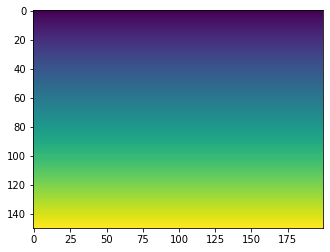

In [9]:
plt.imshow(scan.y.T)
plt.show()

In [7]:
scan

EBSD scan of size 200 x 150
spatial resolution: xStep=0.4, yStep=0.4

In [5]:
indices = np.where(scan.phase > 0)

In [7]:
indices[0][0], indices[1][0]

(0, 0)

In [4]:
scan.compute_ipf_maps()

computing IPF maps: 100%|██████████| 29975/29975 [00:05<00:00, 5072.94it/s]


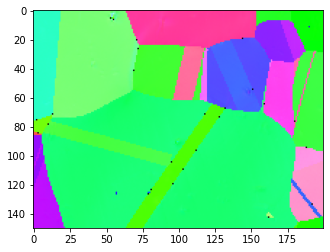

In [5]:
plt.imshow(scan.ipf001.transpose(1, 0, 2))

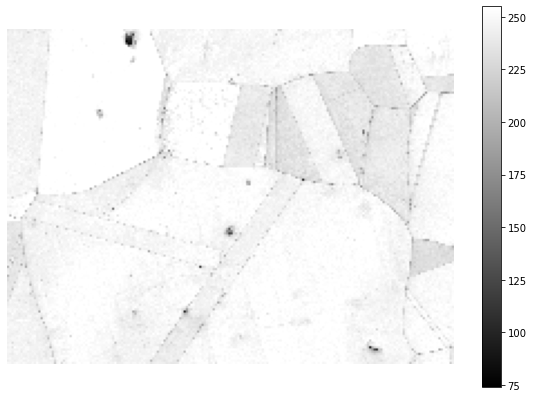

In [7]:
plt.figure(figsize=(10, 7))
plt.imshow(scan.ci.T, cmap=cm.gray)
plt.colorbar()
plt.axis('off')
plt.show()

In [1]:
from pymicro.crystal.microstructure import Microstructure
import numpy as np

# load the segmentation
grain_ids = np.squeeze(np.load('Eprouvette_20220719_Specimen_1_Site_4_Map_Data_7_grains.npy'))

# here we need ref_frame=3 to match DCT, ref_frame=4 to match Oxford coordinate systems

# directly import the EBSD data, here we chose not to take the confidence index into account
m = Microstructure.from_ebsd('Eprouvette_20220719_Specimen_1_Site_4_Map_Data_7.ctf', 
                             roi=[0, 600, 0, 450], ds=3, tol=5., min_ci=50., grain_ids=grain_ids)

0 phases found in the data set
new phase added: unknown
Eprouvette_20220719_Specimen_1_Site_4_Map_Data_7 .ctf
using ref_frame 4
symmetry was changed to Symmetry.cubic
adding phase Phase 1 (Ni-superalloy) 
	-- Lattice (Symmetry.cubic) a=0.357, b=0.357, c=0.357 alpha=90.0, beta=90.0, gamma=90.0
importing data from region [0, 600, 0, 450]
downsampling data by a factor 3
using spatial reference frame for orientation data


changing orientation reference frame progress: 100%|██████████| 29975/29975 [00:02<00:00, 14020.16it/s]




0 phases found in the data set
new phase added: Ni-superalloy
using existing segmentation containing 61 grains, size is  (200, 150)





creating new grains: 100%|██████████| 61/61 [00:28<00:00,  2.15it/s]


computing grains geometry


In [7]:
m.get_grain_rodrigues(id_list=[13])

array([[0.41390696, 0.12185032, 0.2659764 ]], dtype=float32)

In [9]:
m.get_grain_map().shape

(200, 150, 1)

In [10]:
m.get_field('euler').shape

(200, 150, 3)

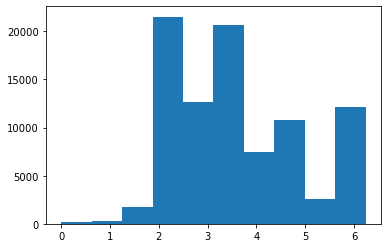

In [12]:
from matplotlib import pyplot as plt

plt.hist(m.get_field('euler').ravel());plt.show()

In [18]:
from pymicro.crystal.microstructure import Orientation
rods = Orientation.eu2ro(m.get_field('euler').reshape((200*150, 3)))
rods = rods.reshape((200, 150, 3))
m.set_orientation_map(rods)

[ 0.01487091  0.3287407  -0.30289032]


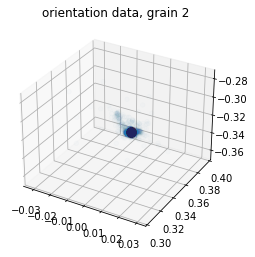

In [34]:
gid = 2
sym = m.get_phase(1).get_symmetry()
rods_gid = m.fz_grain_orientation_data(gid, plot=False, move_to_fz=True)
#mean_rod = Orientation.compute_mean_orientation(rods_gid, symmetry=sym).rod
print(mean_rod)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(rods_gid[:, 0], rods_gid[:, 1], rods_gid[:, 2], alpha=0.1)
ax.scatter(mean_rod[0], mean_rod[1], mean_rod[2], s=100, c='r')
plt.ylim(0.3, 0.4)
plt.title('orientation data, grain %d' % gid)
plt.show()

In [35]:
# misorientation distribution within the grain
grod = m.compute_god_map(id_list=[2], store=True, recompute_mean_orientation=False)

grain ids shape (200, 150, 1)
orientation map shape (200, 150, 1, 3)
all grains are present in the GrainDataTable
GOD computation progress: 100.00 %grain 2)


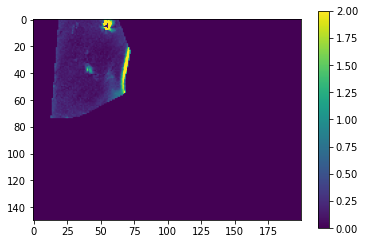

In [40]:
plt.imshow(np.squeeze(grod).T, vmax=2)
plt.colorbar()
plt.show()

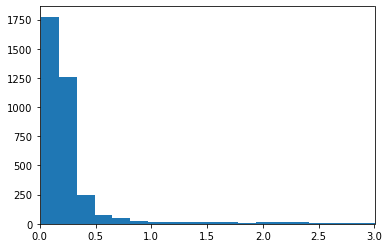

In [43]:
grain_map = m.get_grain_map()
grod_gid = grod[grain_map == gid]
plt.hist(grod_gid, bins=50)
plt.xlim(0, 3)
plt.show()

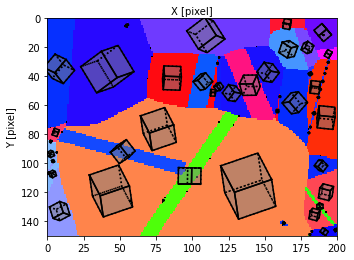

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='X [pixel]', ylabel='Y [pixel]'>)

In [4]:
m.view_slice(color='ipf', axis=[1, 0, 0], show_lattices=True, unit='pixel')

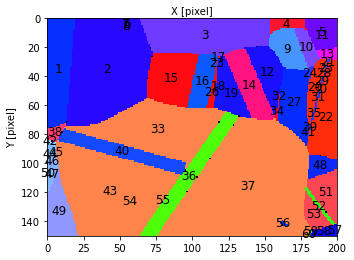

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='X [pixel]', ylabel='Y [pixel]'>)

In [19]:
m.view_slice(color='ipf', axis=[1, 0, 0], show_grain_ids=True, unit='pixel')

In [13]:
m = Microstructure('Eprouvette_20220719_Specimen_1_Site_4_Map_Data_7_data.h5')

In [18]:
np.save('Eprouvette_20220719_Specimen_1_Site_4_Map_Data_7_grains.npy', m.get_grain_map())